# CCFDetector: Using ML against Credit Card Frauds

L'obiettivo di questo progetto, realizzato per l'esame di Fondamenti di Intelligenza Artificiale presso l'Univeristà degli Studi di Salerno, è quello di realizzare un sistema di Machine Learning per l'individuazione di transazioni fraudolente relative ai pagamenti elettronici, cioè tutte quelle transazioni effettuate da carte di credito non in possesso dell'autore della transazione.
## Setup del progetto e Data Understanding
---
### Inizio ad importare le librerie necessarie

In [1]:
# import the necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec

### Carico il dataset

In [2]:
dataset = pd.read_csv('creditcard.csv')
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Descrizione del dataset
Il dataset utilizzato, contiene le transazioni effettuate da carte di credito in due giorni del settembre del 2013. Molte delle features (da *V1* a *V28*) sono riservate, ovviamente, per motivi di privacy. Le uniche features che non sono state nascoste sono *Time*, che rappresenta il tempo, in secondi, tra la transazione corrispondente e la prima transazione del dataset, *Amount*, che rappresenta l'ammontare, appunto, della transazione, e, infine, *Class*, che assume valore 1 se la transazione è stata segnalata come fraudolenta, 0 altrimenti. 
Vado, ora, ad analizzare il dataset per verificare se sia *unbalanced*, come mi aspetto, oppure no e controllo se ci sono valori null.

In [3]:
# Checking n. of frauds in the dataset
fraud = dataset[dataset['Class'] == 1]
valid = dataset[dataset['Class'] == 0]
ratio = len(fraud)/float(len(valid))
print(ratio)
print('Fraud cases: {}'.format(len(dataset[dataset['Class'] == 1])))
print('Valid cases: {}'.format(len(dataset[dataset['Class'] == 0])))

# Checking null values using isna() method
nan_mask = dataset.isna()
nan_count = nan_mask.sum().max()
print('Max number of NaNs: {}'.format(nan_count))


0.0017304750013189597
Fraud cases: 492
Valid cases: 284315
Max number of NaNs: 0


Non ci sono valori null ma, come possiamo notare, il dataset è altamente *unbalanced*; infatti, solo lo 0.17% delle transazioni risulta essere etichettato come fraudolento.

Utilizzo la libreria *seaborn* per visualizzare la distribuzione delle due classi:

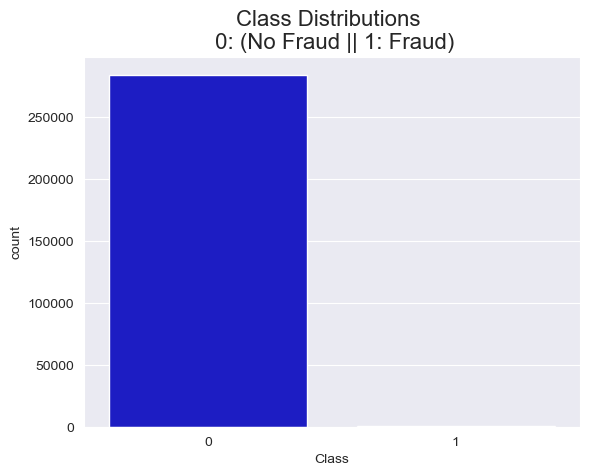

In [4]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=dataset, palette=colors)
plt.title('Class Distributions \n 0: (No Fraud || 1: Fraud)', fontsize=16)
plt.show()

Proseguo analizzando i dettagli relativi alla quantità di denaro utilizzata nelle transazioni fraudolente e nelle transazioni lecite.

In [5]:
print("Dettagli di Amount nelle transazioni fraudolente")
fraud.Amount.describe()

Dettagli di Amount nelle transazioni fraudolente


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [6]:
print("Dettagli di Amount nelle transazioni non fraudolente")
valid.Amount.describe()

Dettagli di Amount nelle transazioni non fraudolente


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Come si può ben notare, le cifre relative alle transazioni fraudolente sono più alte, con una media di 122.2 per le transazioni fraudolente, contro gli 88.2 delle transazioni non fraudolente.

## Data Preparation
---
### Feature Scaling
Come visto precedentemente, le caratteristiche V1, ..., V28, sono state scalate quando è stata effettuata la trasformazione PCA, mentre le uniche caratteristiche che non sono state soggette a tale trasformazione sono *Time* e *Amount*. Osservandone i valori, questi si discostano di molto da quelli delle features che risultano essere state già scalate. Per poter scegliere quale *scaler* utilizzare, vado ad osservare la distribuzione dei valori delle due features considerate.

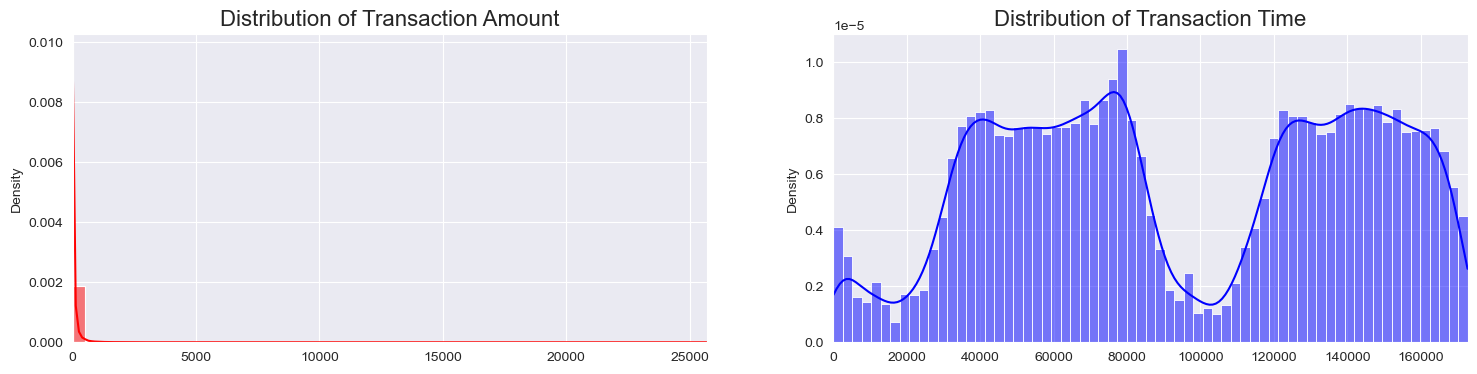

In [7]:
# Generating distribution histrograms

# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = dataset['Amount'].values
time_val = dataset['Time'].values

# Distribution of Amount 
sns.histplot(amount_val, ax=ax[0], color='r', stat='density', common_norm=False, bins=50, kde=True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=16)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# Distribution of Time
sns.histplot(time_val, ax=ax[1], color='b', stat='density' , kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=16)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

Come possiamo osservare, la distribuzione dei valori di *Amount* è fortemente asimmetrica a destra: la maggior parte delle transazioni ha importi relativamente bassi, mentre poche sono le transazioni che hanno importi più alti (outliers).
Per questa ragione, utilizziamo lo scaler **RoubstScaler** della libreria *scikit-learn*. Infatti, questo scaler risulta essere particolarmente appropriato per situazioni in cui la distribuzione dei dati è asimmetrica e in cui, dunque, ci sono outliers.

In [8]:
# Scaling Amount and Time

from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

dataset['ScaledAmount'] = robust_scaler.fit_transform(dataset['Amount'].values.reshape(-1, 1))
dataset['ScaledTime'] = robust_scaler.fit_transform(dataset['Time'].values.reshape(-1, 1))

# Dropping original columns
dataset.drop(['Time', 'Amount'], axis=1, inplace=True)

# dataset.head()

# Columns have been added at the end of the table, after the feature Class
# So I place them at the beginning for readability

scaled_amount = dataset['ScaledAmount']
scaled_time = dataset['ScaledTime']

dataset.drop(['ScaledAmount', 'ScaledTime'], axis=1, inplace=True)
dataset.insert(0, 'ScaledAmount', scaled_amount)
dataset.insert(1, 'ScaledTime', scaled_time)

dataset.head()


,ScaledAmount,ScaledTime,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Feature Selection
In questa fase vado a ricercare le caratteristiche più rilevanti per la predizione, scartando, infine, quelle con una potenza predittiva non adeguata che possono rendere un modello più impreciso e impattare negativamente le performances. In particolare, il mio obiettivo è quello di trovare le variabili che hanno una forte correlazione con la variabile dipendente.
**Matrice di Correlazione**
La tecnica che utilizzo è nota come Matrice di Correlazione, e mostra quanto ogni variabile del dataset è correlata con le altre.

<Axes: >

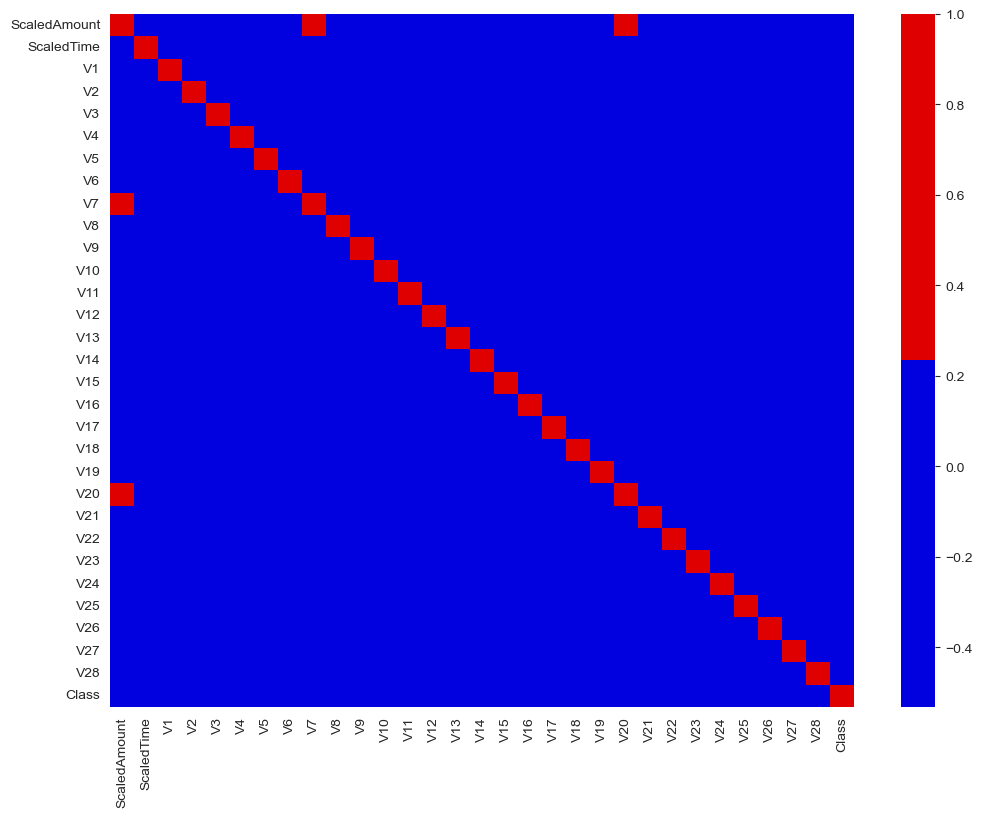

In [9]:
# Plotting a correlation matrix
fig = plt.figure(figsize = (12, 9))
sns.heatmap(dataset.corr(),cmap = colors,cbar = True)

Il numero delle caratteristiche è alto, dunque risulta complicato avere una chiara comprensione delle relazioni tra di esse. Per questa ragione, vado a rappresentare solo le correlazioni di ciascuna caratteristica con la variabile dipendente. A causa dell'elevato numero di caratteristiche, suddivido il grafico in due parti.

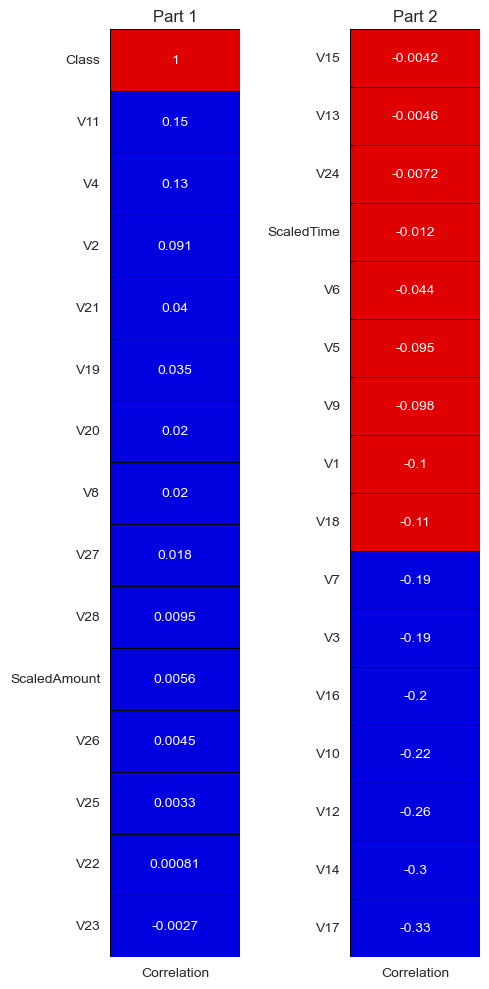

In [10]:
# Calculating the correlation between every feature and the target variable Class
corr = dataset.corrwith(dataset['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation'] # Renaming the resulting column
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
# Creating the first heatmap containing the first 15 rows of the correlation matrix
sns.heatmap(corr.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 1') 

plt.subplot(1,2,2)
sns.heatmap(corr.iloc[15:31],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 2')

fig.tight_layout(w_pad = 2)

Dal grafico risultante, vado ad escludere le caratteristiche che hanno un basso grado di correlazione con la variabile dipendente, scegliendo come intervallo di esclusione **[-0.1, 0.1]**. Osservo che le features V4 e v11 sono positivamente correlate con la caratteristica *Class*, mentre le features V7, V3, V16, V10, V12, V14, V17 sono correlate negativamente con essa.
A questo punto vado a creare un nuovo dataset, inserendogli solamente le features rilevanti appena individuate.

In [11]:
df1 = dataset[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df1

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0
...,...,...,...,...,...,...,...,...,...,...
284802,-9.834783,-2.066656,-4.918215,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0
284803,2.035030,-0.738589,0.024330,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,0
284804,-3.249640,-0.557828,-0.296827,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0
284805,0.702510,0.689799,-0.686180,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,0


### Data Balancing
Prima di procedere con il sampling, devo dividere il dataset originale in *training set* e *test set*. Bisogna infatti bilanciare solo i dati di addestramento, mentre i dati di test devono rispecchiare la realtà il più possibile, dunque devono essere sbilanciati, altrimenti il modello effettuerà predizioni accurate in fase di addestramento, ma non in fase di rilascio (Data Leakage).
Dunque, innanzitutto divido le features dalla variabile target; successivamente divido il dataset utilizzando la funzione *train_test_split*, impostando come dati di training il 70% del totale, mentre come dati di test il restante 30%.
Per la divisione utilizzo la funzione *iloc* di pandas.

In [12]:
from sklearn.model_selection import train_test_split

# Separating features and target
X = df1.iloc[:,:9].values # Features - select all rows and the first 9 columns
y = df1.iloc[:,9].values # Target

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number of transactions X_train dataset: ", X_train.shape)
print("Number of transactions y_train dataset: ", y_train.shape)
print("Number of transactions X_test dataset: ", X_test.shape)
print("Number of transactions y_test dataset: ", y_test.shape)


Shape of X: (284807, 9)
Shape of y: (284807,)
Number of transactions X_train dataset:  (199364, 9)
Number of transactions y_train dataset:  (199364,)
Number of transactions X_test dataset:  (85443, 9)
Number of transactions y_test dataset:  (85443,)


A questo punto posso passare a bilanciare i dati di addestramento utilizzando una tecnica chiamata *SMOTE*.

In [13]:
import imblearn
from imblearn.over_sampling import SMOTE

In [14]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# Applying SMOTE
sm = SMOTE(random_state=2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 345
Before OverSampling, counts of label '0': 199019 

After OverSampling, the shape of train_X: (398038, 9)
After OverSampling, the shape of train_y: (398038,) 

After OverSampling, counts of label '1': 199019
After OverSampling, counts of label '0': 199019
